# Radial Basis Function
A radial basis function network is an artificial neural network that uses radial basis functions as activation functions. The output of the network is a linear combination of radial basis functions of the inputs and neuron parameters.

## Import Modules
- `numpy` for n-dim array processing
- `scikit-learn` for using Kmeans algorithm
- `scipy.spatial.distance` for distance calculation

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt

## Generating Sample data for training 

In [48]:
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2, random_state=42, n_redundant=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("X and y\n")

print(X[:5], y[:5], sep="\n\n")

X and y

[[-0.99910178 -0.66386   ]
 [ 1.24668618  1.15359685]
 [ 0.96277683  0.85939747]
 [-2.95744095  2.03364529]
 [ 1.14116527  1.05944863]]

[1 1 1 1 1]


## Estimating prototype vectors 

In [50]:
num_neurons = 10

kmeans = KMeans(n_clusters=num_neurons, random_state=42, n_init=10)

kmeans.fit(X_train)

centers = kmeans.cluster_centers_

print("Center:\n", centers)

Center:
 [[-0.8692364  -0.65864468]
 [ 2.53446783  2.35687357]
 [ 1.98458412 -1.101229  ]
 [-2.16151064  2.60967372]
 [-0.13595674  0.47263506]
 [-1.41909706 -2.21144242]
 [-1.89697275  0.99213769]
 [ 1.23312034  1.21393961]
 [ 0.61193541 -1.041979  ]
 [-0.16678152  2.0800995 ]]


In [51]:
std_dev = np.mean(cdist(centers, centers, 'euclidean')) / np.sqrt(2*num_neurons)
print("Standard Deviation:", std_dev)

Standard Deviation: 0.6120404511235887


## Defining RBF Activation

In [5]:
def rbf_activation(X, centers, std_dev):
    return np.exp(-cdist(X, centers, 'sqeuclidean') / (2 * std_dev**2))

In [6]:
rbf_train = rbf_activation(X_train, centers, std_dev)
rbf_test = rbf_activation(X_test, centers, std_dev)

rbf_train = np.hstack([rbf_train, np.ones((rbf_train.shape[0], 1))])
rbf_test = np.hstack([rbf_test, np.ones((rbf_test.shape[0], 1))])

## Training RBFNN

In [7]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(rbf_train, y_train)

y_pred = clf.predict(rbf_test)

accuracy = accuracy_score(y_pred, y_test)

print("Accuracy: ", accuracy*100)


Accuracy:  85.0


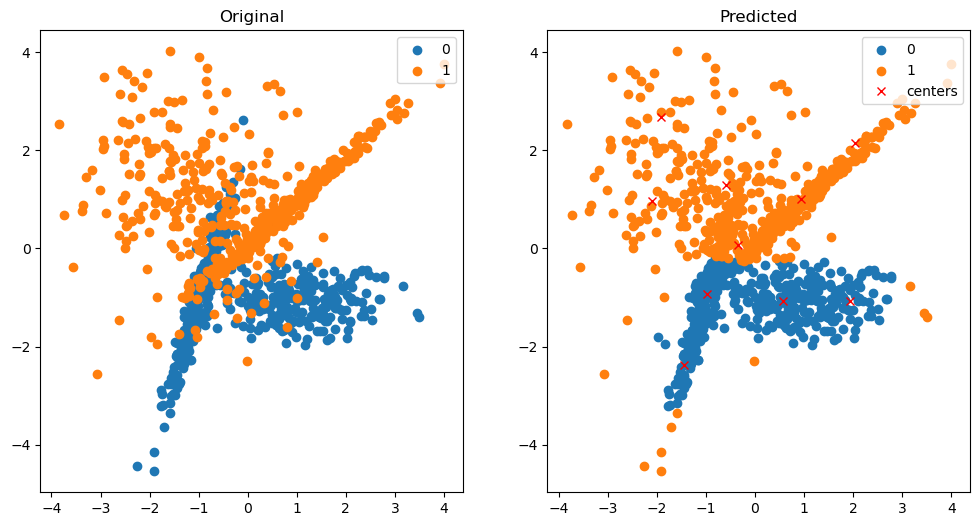

In [45]:
def plot_result(X, y, centers=None):
    plt.scatter(X[y==0, 0], X[y==0, 1], label="0")
    plt.scatter(X[y==1, 0], X[y==1, 1], label="1")
    if centers is not None:
        plt.plot(centers[:, 0], centers[: ,1],'rx', label="centers")
    plt.legend(loc="upper right")

rbf_x = rbf_activation(X, centers=centers, std_dev=std_dev)
activated_x = np.hstack([rbf_x, np.ones((rbf_x.shape[0], 1))])
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("Original")
plot_result(X, y)
plt.subplot(122)
plt.title("Predicted")
plot_result(X, clf.predict(activated_x), centers=centers)
